In [1]:
import os
import time
import string

import numpy as np
import pandas as pd
import polars as pl

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")


'''
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

x.plot('value', cmap='Blues', ax=ax, legend=True)
plt.title('Total Amount of Fundings [KRW]')
plt.text(133.3, 38.7, 'log10', fontsize=8)
plt.ylabel('lat')
plt.xlabel('lon')

axi=1
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')
plt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')
plt.ylabel('Total Amount of Fundings [KRW]')
plt.xlabel('Rank of Area')
plt.yscale('log')
plt.savefig('../Funding/CT_ave_ct.pdf', format='pdf')
'''

"\nN_ROW = 1\nN_COL = 2\nX_SIZE = 6\nY_SIZE = 4\nDPI = 300\n# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']\nplt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']\n\nfig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)\nspec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)\naxes = []\n\naxi=0\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\n\nx.plot('value', cmap='Blues', ax=ax, legend=True)\nplt.title('Total Amount of Fundings [KRW]')\nplt.text(133.3, 38.7, 'log10', fontsize=8)\nplt.ylabel('lat')\nplt.xlabel('lon')\n\naxi=1\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\nplt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')\nplt.ylabel('Total Amount of Fundings [KRW]')\

In [3]:
path = '/Data/Backup/Data/Funding/KR_NTIS/'

df_pap2 = pl.read_parquet(path+'2_paper_added_feature.parquet')

In [4]:
df_pap2

shape: (865_247, 69)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ ‚îÜ Í≥ºÏ†úÍ≥†Ïú†Î≤àÌò∏ ‚îÜ Ïù¥Ï†ÑÍ≥ºÏ†úÍ≥†Ïú†Î≤à ‚îÜ Ï†ïÎ∂Ä Ïó∞Íµ¨ÎπÑ ‚îÜ ‚Ä¶ ‚îÜ ÎÇ¥Ïó≠ÏÇ¨ÏóÖÎ™Ö    ‚îÜ G1  ‚îÜ G2  ‚îÜ G3  ‚îÇ
‚îÇ ---          ‚îÜ ---          ‚îÜ Ìò∏             ‚îÜ ---         ‚îÜ   ‚îÜ ---           ‚îÜ --- ‚îÜ --- ‚îÜ --- ‚îÇ
‚îÇ i64          ‚îÜ str          ‚îÜ ---            ‚îÜ i64         ‚îÜ   ‚îÜ str           ‚îÜ i8  ‚îÜ i8  ‚îÜ i8  ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ str            ‚îÜ             ‚îÜ   ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2021         ‚îÜ 1711139547   ‚îÜ 1711112960     ‚îÜ 150000000   ‚îÜ ‚Ä¶ ‚îÜ Ïö∞ÏàòÏã†ÏßÑÏó∞Íµ¨  ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ 2021         ‚îÜ 1345335340   ‚îÜ 1345330103     ‚îÜ 300194500   ‚îÜ ‚Ä¶ ‚îÜ 4Îã®Í≥ÑBK21ÏÇ¨ÏóÖ ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ 2020         ‚îÜ 1345325237   ‚îÜ None           ‚îÜ 14000000    ‚îÜ ‚Ä¶ ‚îÜ (BÏú†Ìòï) Ïù∏Î¨∏  ‚îÜ 1   ‚îÜ 1   ‚îÜ 1   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÏÇ¨ÌöåÌïôÏà†Ïó∞Íµ¨  ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÍµêÏàò          ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2018         ‚îÜ 1345290366   ‚îÜ 1345274065     ‚îÜ 351239000   ‚îÜ ‚Ä¶ ‚îÜ BK21ÌîåÎü¨Ïä§    ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ 2021         ‚îÜ 1345338581   ‚îÜ None           ‚îÜ 25220000    ‚îÜ ‚Ä¶ ‚îÜ Ïã†ÏßÑÏó∞Íµ¨ÏûêÏßÄ  ‚îÜ 1   ‚îÜ 1   ‚îÜ 1   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÏõêÏÇ¨ÏóÖ(Ïù∏Î¨∏ÏÇ¨ ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ Ìöå)           ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÇ
‚îÇ 2019         ‚îÜ 1345308010   ‚îÜ None           ‚îÜ 14000000    ‚îÜ ‚Ä¶ ‚îÜ ÏãúÍ∞ÑÍ∞ïÏÇ¨ÏßÄÏõê  ‚îÜ 1   ‚îÜ 1   ‚îÜ 1   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÏÇ¨ÏóÖ          ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2021         ‚îÜ 1425157216   ‚îÜ None           ‚îÜ 150000000   ‚îÜ ‚Ä¶ ‚îÜ 2021ÎÖÑÎèÑ Ï§ëÏÜå ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ Í∏∞ÏóÖÍ∏∞Ïà†ÌòÅÏã†  ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ Í∞úÎ∞úÏÇ¨ÏóÖ ÏãúÏû• ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÌôïÎåÄÌòï(BIG3‚Ä¶  ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2021         ‚îÜ 1345334817   ‚îÜ 1345330626     ‚îÜ 249895500   ‚îÜ ‚Ä¶ ‚îÜ 4Îã®Í≥ÑBK21ÏÇ¨ÏóÖ ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ 2018         ‚îÜ 1711078736   ‚îÜ None           ‚îÜ 360000000   ‚îÜ ‚Ä¶ ‚îÜ Í≥ºÌïôÍ∏∞Ïà†Íµ≠Ï†ú  ‚îÜ 0   ‚îÜ 0   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÌòëÎ†•ÎÑ§Ìä∏ÏõåÌÅ¨  ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÏßÄÏõê          ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2019         ‚îÜ 1711096617   ‚îÜ None           ‚îÜ 140000000   ‚îÜ ‚Ä¶ ‚îÜ Ìï¥Ïô∏ÎåÄÌòïÏó∞Íµ¨  ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ             ‚îÜ   ‚îÜ ÏãúÏÑ§ ÌôúÏö©Ïó∞Íµ¨ ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ        

In [6]:
cols = ['Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ',
 'Í≥ºÏ†úÍ≥†Ïú†Î≤àÌò∏','nid',
 'Í≥ºÏ†úÏú†Ìòï', 'Ï¥ù Ïó∞Íµ¨ÎπÑ', 'Ïó∞Íµ¨Í∞úÎ∞úÎã®Í≥Ñ', "Ï¥ù Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê",
 'DOI_url',
 'ÎÖºÎ¨∏Î™Ö',
 'uid',
 'pubyear',
 'vol',
 'issue',
 'ISBN',
 'P_ISSN',
 'E_ISSN',
 'wos_total',
 'country',
 'macro_id',
 'meso_id',
 'micro_id',
 'excellence_1',
 'excellence_5',
 'excellence_10',
 'fwci',
 'ÏÇ¨ÏóÖÎ™Ö',
 'ÎÇ¥Ïó≠ÏÇ¨ÏóÖÎ™Ö',
 'G1',
 'G2',
 'G3',
]

df_pap2 = df_pap2.with_columns((pl.col("Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê_ÏÑ±Î≥Ñ_ÎÇ®").cast(pl.Int32)+pl.col("Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê_ÏÑ±Î≥Ñ_Ïó¨").cast(pl.Int32)).alias("Ï¥ù Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê"))

df_pap_unq = df_pap2.select([pl.col(col) for col in cols]).unique()

In [7]:
df = df_pap_unq.unique(subset=['Í≥ºÏ†úÍ≥†Ïú†Î≤àÌò∏', 'uid'])
df

shape: (656_707, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ ‚îÜ Í≥ºÏ†úÍ≥†Ïú†Î≤àÌò∏ ‚îÜ nid            ‚îÜ Í≥ºÏ†úÏú†Ìòï   ‚îÜ ‚Ä¶ ‚îÜ ÎÇ¥Ïó≠ÏÇ¨ÏóÖÎ™Ö     ‚îÜ G1  ‚îÜ G2  ‚îÜ G3  ‚îÇ
‚îÇ ---          ‚îÜ ---          ‚îÜ ---            ‚îÜ ---        ‚îÜ   ‚îÜ ---            ‚îÜ --- ‚îÜ --- ‚îÜ --- ‚îÇ
‚îÇ i64          ‚îÜ str          ‚îÜ str            ‚îÜ str        ‚îÜ   ‚îÜ str            ‚îÜ i8  ‚îÜ i8  ‚îÜ i8  ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 2020         ‚îÜ 1415171790   ‚îÜ KISTI-2020-S38 ‚îÜ ÏûêÏú†Í≥µÎ™®Ìòï ‚îÜ ‚Ä¶ ‚îÜ ÏÜåÏû¨Î∂ÄÌíàÍ∏∞Ïà†Í∏∞ ‚îÜ 1   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 5703-1YPBbu    ‚îÜ            ‚îÜ   ‚îÜ Î∞òÌòÅÏã†         ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2022         ‚îÜ 1425170507   ‚îÜ KISTI-2022-S41 ‚îÜ ÌíàÎ™©ÏßÄÏ†ïÌòï ‚îÜ ‚Ä¶ ‚îÜ 2022ÎÖÑÎèÑ Ï∞ΩÏóÖ  ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 4075-1YPDsp    ‚îÜ            ‚îÜ   ‚îÜ ÏÑ±Ïû•Í∏∞Ïà†Í∞úÎ∞úÏÇ¨ ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ            ‚îÜ   ‚îÜ ÏóÖ             ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ            ‚îÜ   ‚îÜ Ï†ÑÎûµÌòï(ÏõêÏ†Ñ)   ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ            ‚îÜ   ‚îÜ ÏãúÌñâÍ≥ÑÌöç‚Ä¶      ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2021         ‚îÜ 1711149071   ‚îÜ KISTI-2019-C15 ‚îÜ ÌíàÎ™©ÏßÄÏ†ïÌòï ‚îÜ ‚Ä¶ ‚îÜ ÎèôÏú†ÎüΩ         ‚îÜ 1   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 2426-3YGBsp    ‚îÜ            ‚îÜ   ‚îÜ Íµ≠Í∞ÄÏôÄÏùò ÌòëÎ†•  ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ                ‚îÜ            ‚îÜ   ‚îÜ Í∏∞Î∞òÏ°∞ÏÑ±ÏÇ¨ÏóÖ   ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2020         ‚îÜ 1711103789   ‚îÜ KISTI-2017-C11 ‚îÜ ÌïòÌñ•Ïãù     ‚îÜ ‚Ä¶ ‚îÜ Ïö∞Ï£ºÍ∏∞Ï¥àÎ∂ÑÏïº   ‚îÜ 1   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 7082-4YGBxx    ‚îÜ            ‚îÜ   ‚îÜ                ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2022         ‚îÜ 1345360675   ‚îÜ KISTI-2020-C16 ‚îÜ ÏûêÏú†Í≥µÎ™®Ìòï ‚îÜ ‚Ä¶ ‚îÜ 4Îã®Í≥ÑBK21ÏÇ¨ÏóÖ  ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 9253-3YGAbu    ‚îÜ            ‚îÜ   ‚îÜ                ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ ‚Ä¶            ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÇ
‚îÇ 2022         ‚îÜ 1345360842   ‚îÜ KISTI-2020-C16 ‚îÜ ÏûêÏú†Í≥µÎ™®Ìòï ‚îÜ ‚Ä¶ ‚îÜ 4Îã®Í≥ÑBK21ÏÇ¨ÏóÖ  ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 9082-3YGAbu    ‚îÜ            ‚îÜ   ‚îÜ                ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2021         ‚îÜ 1711145724   ‚îÜ KISTI-2019-C16 ‚îÜ ÏûêÏú†Í≥µÎ™®Ìòï ‚îÜ ‚Ä¶ ‚îÜ Ïö∞ÏàòÏã†ÏßÑÏó∞Íµ¨   ‚îÜ 0   ‚îÜ 1   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 7359-3YGBbu    ‚îÜ            ‚îÜ   ‚îÜ                ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2022         ‚îÜ 1465036177   ‚îÜ KISTI-2020-C17 ‚îÜ ÌíàÎ™©ÏßÄÏ†ïÌòï ‚îÜ ‚Ä¶ ‚îÜ Ïó∞Íµ¨Ï§ëÏã¨Î≥ëÏõêÏú° ‚îÜ 1   ‚îÜ 0   ‚îÜ 0   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 6929-3YGAsp    ‚îÜ            ‚îÜ   ‚îÜ ÏÑ±R&D          ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2021         ‚îÜ 1711128804   ‚îÜ KISTI-2020-C17 ‚îÜ ÌíàÎ™©ÏßÄÏ†ïÌòï ‚îÜ ‚Ä¶ ‚îÜ ÎáåÍ≥ºÌïôÏõêÏ≤úÍ∏∞Ïà† ‚îÜ 0   ‚îÜ 0   ‚îÜ 1   ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ 7465-3YGDsp    ‚îÜ            ‚îÜ   ‚îÜ Í∞úÎ∞úÏÇ¨ÏóÖ       ‚îÜ     ‚îÜ     ‚îÜ     ‚îÇ
‚îÇ 2020         ‚îÜ 1345316592   ‚îÜ KIST

In [8]:
tg_cols_pl_ = [pl.col(x) for x in ['Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ', 'ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'Í≥ºÏ†úÏú†Ìòï', 'excellence_1', 'excellence_5', 'excellence_10', "Ï¥ù Ïó∞Íµ¨ÎπÑ", "Ï¥ù Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê"]]

# ÏÇ¨ÏóÖÎ™Ö Ï†ïÏ†ú
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö").str.replace("\(R&D\)","").alias("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("BK21ÌîåÎü¨Ïä§ÏÇ¨ÏóÖ","BK21ÏÇ¨ÏóÖ_ÌÜµÌï©").replace("4Îã®Í≥ÑÎëêÎáåÌïúÍµ≠21ÏÇ¨ÏóÖ","BK21ÏÇ¨ÏóÖ_ÌÜµÌï©"))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("(Ï£ºÏöîÏÇ¨ÏóÖÎπÑ)","", literal=True))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("[\.¬∑]",""))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("Í≥ºÍ∏∞Ï†ïÌÜµÎ∂Ä","Í≥ºÍ∏∞Î∂Ä"))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("(ÏÇ∞ÏóÖÎ∂Ä,Î≥µÏßÄÎ∂Ä,Í≥ºÍ∏∞Î∂Ä)","(Í≥ºÍ∏∞Î∂Ä,Î≥µÏßÄÎ∂Ä,ÏÇ∞ÏóÖÎ∂Ä)", literal=True))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("Í∞úÎ∞úÏÇ¨ÏóÖ","Í∞úÎ∞ú"))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("ÏñëÏÑ±ÏÇ¨ÏóÖ","ÏñëÏÑ±"))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("(ÏóêÌäπ)","", literal=True))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("(Ï†ÑÎ†•)","", literal=True))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("Ï†ïÎ≥¥ÌÜµÏã†Î∞©ÏÜ°ÌòÅÏã†Ïù∏Ïû¨ÏñëÏÑ±","Ï†ïÎ≥¥ÌÜµÏã†(Î∞©ÏÜ°ÌòÅÏã†Ïù∏Ïû¨+Í∏∞Ïà†Ïù∏Î†•)ÏñëÏÑ±", literal=True))
df = df.with_columns(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").str.replace("Ï†ïÎ≥¥ÌÜµÏã†Í∏∞Ïà†Ïù∏Î†•ÏñëÏÑ±","Ï†ïÎ≥¥ÌÜµÏã†(Î∞©ÏÜ°ÌòÅÏã†Ïù∏Ïû¨+Í∏∞Ïà†Ïù∏Î†•)ÏñëÏÑ±", literal=True))

cnt_tot = df.select(tg_cols_pl_).group_by(tg_cols_pl_[:3]).len().to_pandas().dropna().groupby(['Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ', 'ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'Í≥ºÏ†úÏú†Ìòï']).sum().unstack().unstack()['len']
res_tot = df.select(tg_cols_pl_).group_by(tg_cols_pl_[:3]).sum().to_pandas().dropna().groupby(['Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ', 'ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'Í≥ºÏ†úÏú†Ìòï']).sum().unstack().unstack()

res_tot.index = res_tot.index.astype(int)
cnt_tot.index = cnt_tot.index.astype(int)

In [9]:
tg_project = df.select(tg_cols_pl_).drop_nulls("excellence_10").filter(pl.col("excellence_10") > 0).unique(
    "ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú").select(pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú")).to_pandas()["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"].values
len(tg_project)

620

In [116]:
df_edge = df.select([pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"), pl.col("uid")]).drop_nulls().to_pandas()
df_edge['count'] = 1

edge_cnt = df_edge.groupby(["uid"]).count()
co_papers = edge_cnt[edge_cnt > 1].dropna().index.values

msk_tg_project = df_edge["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"].isin(tg_project)
msk_co_paper = df_edge["uid"].isin(co_papers)
df_edge = df_edge[msk_tg_project & msk_co_paper]
df_edge['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú'] = df_edge['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú'].str.replace("Ïó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê","")

In [228]:
def fast_bipartite_projection(B, nodes_A):
    """ scipy.sparseÎ•º ÌôúÏö©Ìïú Îπ†Î•∏ bipartite projection (ÏßÑÌñâÎ•† ÌëúÏãú) """
    import scipy.sparse as sp

    print("[1/5] ÎÖ∏Îìú Ïù∏Îç±Ïä§ Îß§Ìïë ÏãúÏûë...")
    
    # ÎÖ∏Îìú Ïù∏Îç±Ïä§ Îß§Ìïë
    nodes_A = list(nodes_A)
    nodes_B = list(set(B) - set(nodes_A))  # B ÏßëÌï© Ï∂îÏ∂ú

    node_index_A = {node: i for i, node in enumerate(nodes_A)}
    node_index_B = {node: i for i, node in enumerate(nodes_B)}

    print("[2/5] Sparse ÌñâÎ†¨ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...")
    
    # Sparse ÌñâÎ†¨ÏùÑ ÏúÑÌïú row, col Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    row_ind, col_ind = [], []
    for a, b in tqdm(B.edges(), desc="  -> (ÏßÑÌñâ) Ïó£ÏßÄ Ï≤òÎ¶¨"):
        if a in node_index_A:  # aÍ∞Ä AÏóê ÏÜçÌï®
            row_ind.append(node_index_A[a])
            col_ind.append(node_index_B[b])
        else:  # bÍ∞Ä AÏóê ÏÜçÌï®
            row_ind.append(node_index_A[b])
            col_ind.append(node_index_B[a])

    print("[3/5] Sparse ÌñâÎ†¨ ÏÉùÏÑ±...")
    
    # (A ÎÖ∏Îìú Í∞úÏàò, B ÎÖ∏Îìú Í∞úÏàò) ÌÅ¨Í∏∞Ïùò Ìù¨ÏÜå ÌñâÎ†¨ ÏÉùÏÑ±
    A_B_matrix = sp.coo_matrix((np.ones(len(row_ind)), (row_ind, col_ind)), 
                               shape=(len(nodes_A), len(nodes_B)))

    print("[4/5] A-A Projection Ïó∞ÏÇ∞ ÏàòÌñâ (ÌñâÎ†¨ Í≥±ÏÖà Ï§ë)...")
    
    # A-A Projection: A_B_matrix * A_B_matrix^T ÏàòÌñâ
    A_projection_matrix = A_B_matrix @ A_B_matrix.T

    print("[5/5] ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ Î≥ÄÌôò Ï§ë...")
    
    # Graph Î≥ÄÌôò
    A_projection = nx.Graph()
    A_projection.add_nodes_from(nodes_A)

    coo = A_projection_matrix.tocoo()
    for i, j, weight in tqdm(zip(coo.row, coo.col, coo.data), 
                             total=len(coo.data), 
                             desc="  -> (ÏßÑÌñâ) Ïó£ÏßÄ Ï∂îÍ∞Ä"):
        if i != j:  # ÏûêÍ∏∞ ÏûêÏã†ÏúºÎ°úÏùò Ïó∞Í≤∞ Ï†úÍ±∞
            A_projection.add_edge(nodes_A[i], nodes_A[j], weight=weight)

    print("‚úÖ Projection ÏôÑÎ£å!")
    
    return A_projection


def draw_weight_filtered_network(graph, weight_threshold):
    """
    ÌäπÏ†ï Edge Weight Ïù¥ÏÉÅÏù∏ Ïó£ÏßÄÎßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏãúÍ∞ÅÌôî (Degree 0 ÎÖ∏Îìú Ï†úÍ±∞ Ìè¨Ìï®)
    Î∞òÌôòÍ∞í: ÌïÑÌÑ∞ÎßÅÎêú ÏÑúÎ∏åÍ∑∏ÎûòÌîÑ G_filtered
    """
    print(f"üîπ Edge Weight ‚â• {weight_threshold} ÌïÑÌÑ∞ÎßÅ Ï§ë...")

    # (1) Edge Weight Í∏∞Ï§ÄÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
    filtered_edges = [(u, v, d) for u, v, d in graph.edges(data=True) if d.get("weight", 0) >= weight_threshold]

    # (2) Degree 0Ïù¥ ÏïÑÎãå ÎÖ∏ÎìúÎßå Ï∂îÏ∂ú
    filtered_nodes = set()
    for u, v, _ in filtered_edges:
        filtered_nodes.add(u)
        filtered_nodes.add(v)

    # (3) ÏÑúÎ∏åÍ∑∏ÎûòÌîÑ ÏÉùÏÑ± (Degree 0 ÎÖ∏Îìú Ï†úÍ±∞)
    G_filtered = graph.subgraph(filtered_nodes).copy()
    G_filtered.remove_edges_from(list(G_filtered.edges()))
    G_filtered.add_edges_from(filtered_edges)

    # üî• Degree 0Ïù∏ ÎÖ∏Îìú Ï†úÍ±∞ (Ïó£ÏßÄÍ∞Ä ÏóÜÎäî ÎÖ∏Îìú ÌïÑÌÑ∞ÎßÅ)
    isolated_nodes = list(nx.isolates(G_filtered))
    G_filtered.remove_nodes_from(isolated_nodes)

    print(f"üìå ÌïÑÌÑ∞ÎßÅÎêú ÎÖ∏Îìú Ïàò: {len(G_filtered.nodes())}, Ïó£ÏßÄ Ïàò: {len(G_filtered.edges())}")
    print(f"üö® Ï†úÍ±∞Îêú Degree 0 ÎÖ∏Îìú Ïàò: {len(isolated_nodes)}")

    return G_filtered


def adjust_positions(pos, node_sizes, min_factor=1.2, iterations=50, step_size=0.01):
    """
    ÎÖ∏Îìú Í∞Ñ ÏµúÏÜå Í±∞Î¶¨ Ïú†ÏßÄÌïòÎèÑÎ°ù Î∞ÄÏñ¥ÎÇ¥Îäî ÏïåÍ≥†Î¶¨Ï¶ò (ÎÖ∏Îìú ÌÅ¨Í∏∞Ïóê ÎπÑÎ°Ä)
    - min_factor: ÎÖ∏Îìú ÌÅ¨Í∏∞Ïóê ÎåÄÌïú ÏµúÏÜå Í±∞Î¶¨ Î∞∞Ïàò (1.2 Ïù¥ÏÉÅ Ï∂îÏ≤ú)
    - iterations: Î∞òÎ≥µ ÌöüÏàò
    - step_size: Ïù¥Îèô Í±∞Î¶¨ Ï°∞Ï†ï (Í∞íÏù¥ ÌÅ¨Î©¥ Í∞ïÌïòÍ≤å Î∞ÄÏñ¥ÎÉÑ)
    """
    nodes = list(pos.keys())
    positions = np.array([pos[n] for n in nodes])
    sizes = np.array([node_sizes[i] for i, n in enumerate(nodes)])  # ÎÖ∏Îìú ÌÅ¨Í∏∞ Î¶¨Ïä§Ìä∏

    for _ in range(iterations):
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                vec = positions[i] - positions[j]
                dist = np.linalg.norm(vec)

                # üî• ÏµúÏÜå Í±∞Î¶¨ = Îëê ÎÖ∏ÎìúÏùò ÌÅ¨Í∏∞ ÌèâÍ∑† * min_factor
                min_distance = (sizes[i] + sizes[j]) / 2 * min_factor  

                if dist < min_distance and dist > 0:  # ÏµúÏÜå Í±∞Î¶¨Î≥¥Îã§ ÏûëÏúºÎ©¥ Î∞ÄÏñ¥ÎÉÑ
                    move_vec = (vec / dist) * (min_distance - dist) * step_size
                    positions[i] += move_vec
                    positions[j] -= move_vec

    # ÏúÑÏπò ÏóÖÎç∞Ïù¥Ìä∏
    for i, node in enumerate(nodes):
        pos[node] = positions[i]
    
    return pos

In [238]:
import networkx as nx

# Bipartite Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
B = nx.Graph()

col_A = "ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"
col_B = "uid"

# Îëê Í∞úÏùò ÎÖ∏Îìú ÏßëÌï© Ï†ïÏùò
group_A = df_edge[col_A]
group_B = df_edge[col_B]

# Í∑∏ÎûòÌîÑÏóê ÎÖ∏Îìú Ï∂îÍ∞Ä
B.add_nodes_from(group_A, bipartite=0)  # Í∑∏Î£π A
B.add_nodes_from(group_B, bipartite=1)  # Í∑∏Î£π B

# Í∑∏Î£π AÏôÄ Í∑∏Î£π B Í∞ÑÏùò Ïó£ÏßÄ Ï∂îÍ∞Ä (Ïó∞Í≤∞ Í¥ÄÍ≥Ñ)
edges = df_edge[[col_A, col_B]].values

B.add_edges_from(edges)

# # Projection: A ÎÖ∏ÎìúÎì§ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
print("üîπ Bipartite Projection ÏãúÏûë...")
A_proj = fast_bipartite_projection(B, group_A)

print(f"üìå Projected Graph Nodes: {len(A_proj.nodes)}")
print(f"üìå Projected Graph Edges: {len(A_proj.edges)}")

üîπ Bipartite Projection ÏãúÏûë...
[1/5] ÎÖ∏Îìú Ïù∏Îç±Ïä§ Îß§Ìïë ÏãúÏûë...
[2/5] Sparse ÌñâÎ†¨ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...


  -> (ÏßÑÌñâ) Ïó£ÏßÄ Ï≤òÎ¶¨: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 245062/245062 [00:00<00:00, 1270841.87it/s]


[3/5] Sparse ÌñâÎ†¨ ÏÉùÏÑ±...
[4/5] A-A Projection Ïó∞ÏÇ∞ ÏàòÌñâ (ÌñâÎ†¨ Í≥±ÏÖà Ï§ë)...
[5/5] ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ Î≥ÄÌôò Ï§ë...


  -> (ÏßÑÌñâ) Ïó£ÏßÄ Ï∂îÍ∞Ä: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17003/17003 [00:00<00:00, 888758.39it/s]

‚úÖ Projection ÏôÑÎ£å!
üìå Projected Graph Nodes: 615
üìå Projected Graph Edges: 8194


üîπ Edge Weight ‚â• 100 ÌïÑÌÑ∞ÎßÅ Ï§ë...
üìå ÌïÑÌÑ∞ÎßÅÎêú ÎÖ∏Îìú Ïàò: 101, Ïó£ÏßÄ Ïàò: 240
üö® Ï†úÍ±∞Îêú Degree 0 ÎÖ∏Îìú Ïàò: 0


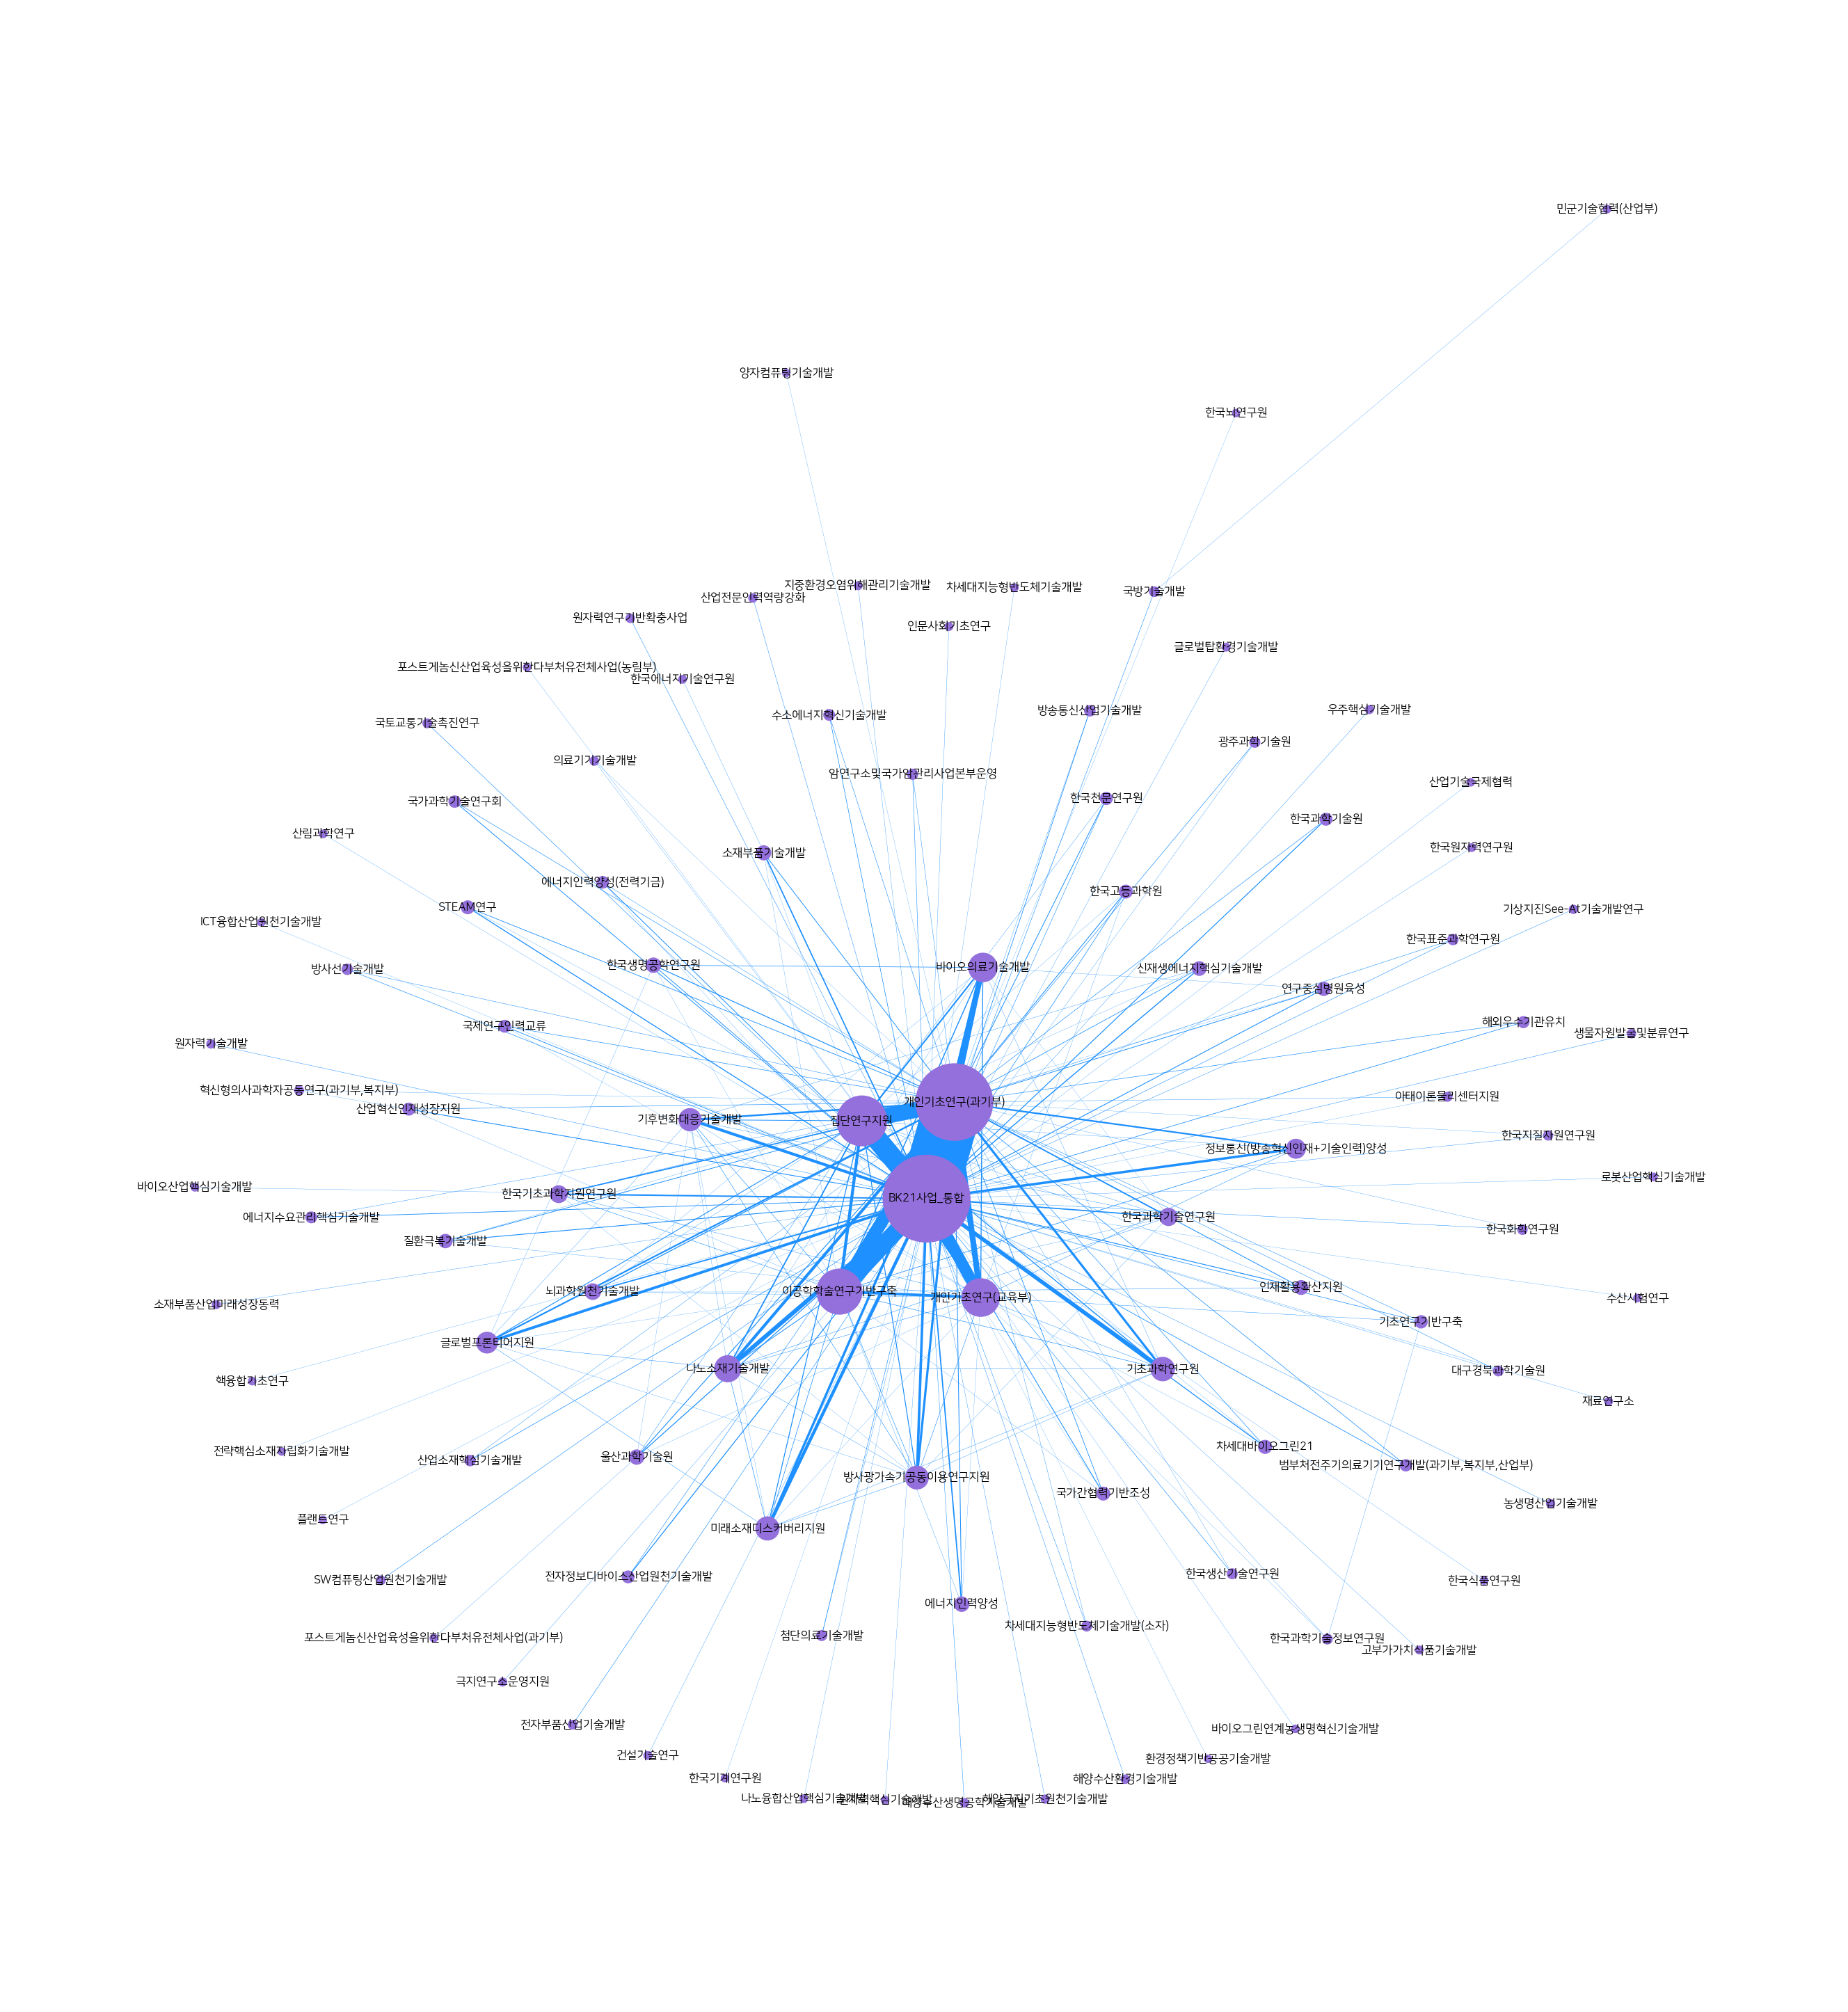

In [239]:
from networkx.drawing.nx_agraph import graphviz_layout


# Params
weight_threshold = 100
EDGE_SCALE = 10
NODE_SCALE = 200
DISTANCE_SCALE = .1


# üîπ ÌïÑÌÑ∞ÎßÅÎêú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±
G_filtered = draw_weight_filtered_network(A_proj, weight_threshold=weight_threshold)

# üî• GraphvizÏùò dot Î†àÏù¥ÏïÑÏõÉ Ï†ÅÏö©
pos = graphviz_layout(G_filtered, prog="neato")

# üî• Edge Í∞ÄÏ§ëÏπòÎ•º Î∞òÏòÅÌïú ÎëêÍªò ÏÑ§Ï†ï
if G_filtered.edges():
    weights = [d["weight"] for _, _, d in G_filtered.edges(data=True)]
    edge_widths = [w / max(weights) * EDGE_SCALE for w in weights]  # Ï†ïÍ∑úÌôîÌïòÏó¨ Ïó£ÏßÄ ÎëêÍªò Ï°∞Ï†ï
else:
    edge_widths = []

# üî• Node Strength (Ïó∞Í≤∞Îêú Ïó£ÏßÄ Í∞ÄÏ§ëÏπò Ìï©) Í∏∞Î∞ò ÌÅ¨Í∏∞ Ï°∞Ï†à
strength_dict = {node: sum(weight for _, _, weight in G_filtered.edges(node, data="weight")) for node in G_filtered.nodes()}
max_strength = max(strength_dict.values()) if strength_dict else 1
node_sizes = [strength_dict[node] / max_strength * NODE_SCALE for node in G_filtered.nodes()]  # Ï†ïÍ∑úÌôîÌïòÏó¨ ÌÅ¨Í∏∞ ÏÑ§Ï†ï

# Position Adjust
pos_adj = adjust_positions(pos, node_sizes, min_factor=DISTANCE_SCALE, iterations=100, step_size=0.01)

# --- ÏãúÍ∞ÅÌôî ---
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 6
DPI = 600
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI, facecolor="none")
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col
# ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

# üîπ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (Graphviz neato Î†àÏù¥ÏïÑÏõÉ ÏÇ¨Ïö©)
nx.draw(G_filtered, pos_adj, with_labels=True, 
        node_color="mediumpurple", edge_color="dodgerblue",
        width=edge_widths, node_size=node_sizes, font_family='NanumSquare', font_size=2)


# plt.title(f"Projected Graph (Filtered: Edge Weight ‚â• {weight_threshold})")
fig.patch.set_alpha(0)  # Î∞∞Í≤Ω Ìà¨Î™Ö ÏÑ§Ï†ï
plt.show()

In [242]:
# Degree & Strength Í≥ÑÏÇ∞
degree_dict = dict(G_filtered.degree())  # Degree Í≥ÑÏÇ∞
strength_dict = {node: sum(weight for _, _, weight in G_filtered.edges(node, data="weight")) for node in G_filtered.nodes()}

# DataFrame ÏÉùÏÑ±
df_stats = pd.DataFrame({
    "Node": list(degree_dict.keys()),
    "Degree": list(degree_dict.values()),
    "Strength": list(strength_dict.values())
})

# Degree, Strength Ï†ïÎ†¨ ÌõÑ Ï∂úÎ†•
df_stats = df_stats.sort_values(by=["Degree", "Strength"], ascending=False)
df_stats.iloc[:10]#[df_stats["Degree"] > 30]

Node  Degree  Strength
59       BK21ÏÇ¨ÏóÖ_ÌÜµÌï©      97   97869.0
3      Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)      56   75110.0
44          ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê      26   29544.0
1      Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)      22   15670.0
87     Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï      21   23621.0
9         ÎÇòÎÖ∏ÏÜåÏû¨Í∏∞Ïà†Í∞úÎ∞ú      12    6622.0
15  Î∞©ÏÇ¨Í¥ëÍ∞ÄÏÜçÍ∏∞Í≥µÎèôÏù¥Ïö©Ïó∞Íµ¨ÏßÄÏõê      12    4745.0
82      Í∏∞ÌõÑÎ≥ÄÌôîÎåÄÏùëÍ∏∞Ïà†Í∞úÎ∞ú      12    4400.0
67       Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú      11    8191.0
20     ÎØ∏ÎûòÏÜåÏû¨ÎîîÏä§Ïª§Î≤ÑÎ¶¨ÏßÄÏõê      10    4909.0

In [243]:
df_edge

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                  uid  count
0         Íµ≠Í∞ÄÍ∞ÑÌòëÎ†•Í∏∞Î∞òÏ°∞ÏÑ±  WOS:000790104600002      1
1         BK21ÏÇ¨ÏóÖ_ÌÜµÌï©  WOS:000831384900001      1
3       Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)  WOS:000481891300014      1
4       Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï  WOS:000873865400001      1
5         BK21ÏÇ¨ÏóÖ_ÌÜµÌï©  WOS:000643953700001      1
...             ...                  ...    ...
369133  Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï  WOS:000820160500001      1
369134    Î∞îÏù¥Ïò§ÏÇ∞ÏóÖÍ∏∞Ïà†Í∞úÎ∞ú  WOS:000869407400004      1
369135    BK21ÏÇ¨ÏóÖ_ÌÜµÌï©  WOS:000754825300001      1
369136  Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)  WOS:000857961200001      1
369138  Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)  WOS:000516552100018      1

[273775 rows x 3 columns]

In [465]:
df_co = df.select([pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"), pl.col("uid")]).drop_nulls().to_pandas()
df_co['count'] = 1

# msk_tg_project = df_co["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"].isin(tg_project)
# df_co = df_co[msk_tg_project]

# Step 3. uidÎ≥Ñ Ï†ÑÏ≤¥ count (Ï¶â, Î™®Îì† ÏÇ¨ÏóÖÏóêÏÑúÏùò Îì±Ïû• ÌöüÏàò)ÏóêÏÑú 1ÏùÑ Î∫Ä Í∞íÏù¥ total_co
total_co = df_co.groupby('uid')[['count']].sum() - 1
total_co.columns = ["total_co"]

# Step 1. (ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú, uid)Î≥ÑÎ°ú count Ìï©ÏÇ∞
df_grouped = df_co.groupby(['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'uid'])['count'].sum()

local = df_grouped[df_grouped == 1]
local = local.reset_index()
local = local[local['uid'].isin(total_co[total_co == 0].dropna().index.values)]
local.columns = ['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'uid', "local"]
local = local.set_index(["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú", "uid"])

# Step 2. Í∞Å (ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú, uid)Î≥Ñ countÏóêÏÑú 1ÏùÑ ÎπºÍ≥†, unstackÌïú ÌõÑ uidÎ≥ÑÎ°ú Ìï©ÏÇ∞ÌïòÎ©¥ internal_coÍ∞Ä Í≥ÑÏÇ∞Îê®
internal_co = (df_grouped - 1).reset_index().fillna(0)
internal_co.columns = ['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', 'uid', "internal_co"]

cnt = df_co.groupby('ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú')['count'].sum()

df_collabo = pd.merge(internal_co, total_co, on='uid')
df_collabo['external_co'] = df_collabo["total_co"] - df_collabo["internal_co"]
df_collabo = df_collabo.set_index(["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú", "uid"])
df_collabo = pd.concat([df_collabo, local], axis=1).fillna(0)
df_collabo["local"] = df_collabo["local"].astype("int")
df_collabo_gr = df_collabo.groupby("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú")[["local", 'internal_co', 'external_co', 'total_co']].sum()
df_collabo_gr['N_paper'] = cnt

In [457]:
df_collabo_gr.sort_values("local")[::-1].iloc[:20]

local  internal_co  external_co  total_co
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                                                        
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©            25899        12758       119249    132007
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)          20123         7983        93389    101372
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)           6911          889        21338     22227
Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï           4479         1803        32384     34187
ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê                2573          448        39384     39832
Í∏∞Ï¥àÍ≥ºÌïôÏó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê        1722           71         7732      7803
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú             1058          762        11957     12719
ÏïîÏó∞Íµ¨ÏÜåÎ∞èÍµ≠Í∞ÄÏïîÍ¥ÄÎ¶¨ÏÇ¨ÏóÖÎ≥∏Î∂ÄÏö¥ÏòÅ       867           16          815       831
ÌïúÍµ≠Í≥†Îì±Í≥ºÌïôÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê         814            5         1522      1527
Ï†ïÎ≥¥ÌÜµÏã†(Î∞©ÏÜ°ÌòÅÏã†Ïù∏Ïû¨+Í∏∞Ïà†Ïù∏Î†•)ÏñëÏÑ±    537          116         4482      4598
ÌïúÍµ≠Ï≤úÎ¨∏Ïó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê         485            3         1236      1239
ÌïúÍµ≠ÏÉùÏÇ∞Í∏∞Ïà†Ïó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê       484            2          849       851
ÌïúÍµ≠Í≥ºÌïôÍ∏∞Ïà†Ïó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê       483           63         3972      4035
ÏõêÏûêÎ†•Í∏∞Ïà†Í∞úÎ∞ú                475           22          539       561
Í∏∞ÌõÑÎ≥ÄÌôîÎåÄÏùëÍ∏∞Ïà†Í∞úÎ∞ú             468          319         6056      6375
ÏÜåÏû¨Î∂ÄÌíàÍ∏∞Ïà†Í∞úÎ∞ú               419           56         2348      2404
ÌïúÍµ≠ÌëúÏ§ÄÍ≥ºÌïôÏó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê       395           44         1346      1390
ÎÇòÎÖ∏ÏÜåÏû¨Í∏∞Ïà†Í∞úÎ∞ú               391          329         9751     10080
Ïó∞Íµ¨Ï§ëÏã¨Î≥ëÏõêÏú°ÏÑ±               387           16         1919      1935
ÌïúÍµ≠ÌïúÏùòÌïôÏó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê        384            0          197       197

In [448]:
on = "uid"
target = "excellence_10"
# tatget = "count"
df_co = df.select([pl.col("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"), pl.col(on), pl.col(target)]).drop_nulls().to_pandas()
# df_co['count'] = 1
df_co[target] = (df_co[target] > 0).astype(int)
df_co = df_co[df_co[target] > 0]

# msk_tg_project = df_co["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"].isin(tg_project)
# df_co = df_co[msk_tg_project]

# Step 3. uidÎ≥Ñ Ï†ÑÏ≤¥ count (Ï¶â, Î™®Îì† ÏÇ¨ÏóÖÏóêÏÑúÏùò Îì±Ïû• ÌöüÏàò)ÏóêÏÑú 1ÏùÑ Î∫Ä Í∞íÏù¥ total_co
total_co = df_co.groupby(on)[[target]].sum() - 1
total_co.columns = ["total_co"]

# Step 1. (ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú, uid)Î≥ÑÎ°ú count Ìï©ÏÇ∞
df_grouped = df_co.groupby(['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', on])[target].sum()

local = df_grouped[df_grouped == 1]
local = local.reset_index()
local = local[local[tg].isin(total_co[total_co == 0].dropna().index.values)]
local.columns = ['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', on, "local"]
local = local.set_index(["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú", on])

# Step 2. Í∞Å (ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú, uid)Î≥Ñ countÏóêÏÑú 1ÏùÑ ÎπºÍ≥†, unstackÌïú ÌõÑ uidÎ≥ÑÎ°ú Ìï©ÏÇ∞ÌïòÎ©¥ internal_coÍ∞Ä Í≥ÑÏÇ∞Îê®
internal_co = (df_grouped - 1).reset_index().fillna(0)
internal_co.columns = ['ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú', on, "internal_co"]



df_collabo = pd.merge(internal_co, total_co, on=on)
df_collabo['external_co'] = df_collabo["total_co"] - df_collabo["internal_co"]
df_collabo = df_collabo.set_index(["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú", on])
df_collabo = pd.concat([df_collabo, local], axis=1).fillna(0)
df_collabo["local"] = df_collabo["local"].astype(int)
df_collabo_gr = df_collabo.groupby("ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú")[["local", 'internal_co', 'external_co', 'total_co']].sum()

In [464]:
df_co.groupby('ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú')['count'].sum()

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú           4
(ÌòÅÏã†ÎèÑÏ†ÑÌòï)ÌîåÎùºÏ¶àÎßàÌôúÏö©ÌèêÏú†Í∏∞Î¨ºÍ≥†Î∂ÄÍ∞ÄÍ∞ÄÏπòÍ∏∞Ï¥àÏõêÎ£åÌôîÍ∏∞Ïà†Í∞úÎ∞ú      2
100ÏÑ∏ÏÇ¨ÌöåÎåÄÏùëÍ≥†Î†πÏπúÌôîÏ†úÌíàÏó∞Íµ¨Í∞úÎ∞ú                  42
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÍ≥†ÎèÑÌôîÎ∞èÏã§Ï¶ù                     8
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÏÇ∞ÏóÖÌôîÍ∏∞Ïà†Í∞úÎ∞ú                    4
                                  ... 
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨                       65
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨ÏÇ¨ÏóÖ                     85
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú                  7
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú(Í≤ΩÏ∞∞Ï≤≠)             2
Ìú¥Î®ºÌîåÎü¨Ïä§ÏúµÌï©Ïó∞Íµ¨Í∞úÎ∞úÏ±åÎ¶∞ÏßÄÏÇ¨ÏóÖ                   128
Name: count, Length: 1134, dtype: int64

In [473]:
df_collabo_gr

local  internal_co  external_co  total_co  \
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                                                                       
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú           2            0            2         2   
(ÌòÅÏã†ÎèÑÏ†ÑÌòï)ÌîåÎùºÏ¶àÎßàÌôúÏö©ÌèêÏú†Í∏∞Î¨ºÍ≥†Î∂ÄÍ∞ÄÍ∞ÄÏπòÍ∏∞Ï¥àÏõêÎ£åÌôîÍ∏∞Ïà†Í∞úÎ∞ú      0            0            4         4   
100ÏÑ∏ÏÇ¨ÌöåÎåÄÏùëÍ≥†Î†πÏπúÌôîÏ†úÌíàÏó∞Íµ¨Í∞úÎ∞ú                  26            2           17        19   
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÍ≥†ÎèÑÌôîÎ∞èÏã§Ï¶ù                     4            0            4         4   
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÏÇ∞ÏóÖÌôîÍ∏∞Ïà†Í∞úÎ∞ú                    1            1            1         2   
...                                ...          ...          ...       ...   
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨                       43            0           35        35   
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨ÏÇ¨ÏóÖ                     58            0           38        38   
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú                  2            0           16        16   
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú(Í≤ΩÏ∞∞Ï≤≠)             1            0            2         2   
Ìú¥Î®ºÌîåÎü¨Ïä§ÏúµÌï©Ïó∞Íµ¨Í∞úÎ∞úÏ±åÎ¶∞ÏßÄÏÇ¨ÏóÖ                    15            3          279       282   

                                 N_paper  
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                                    
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú             4  
(ÌòÅÏã†ÎèÑÏ†ÑÌòï)ÌîåÎùºÏ¶àÎßàÌôúÏö©ÌèêÏú†Í∏∞Î¨ºÍ≥†Î∂ÄÍ∞ÄÍ∞ÄÏπòÍ∏∞Ï¥àÏõêÎ£åÌôîÍ∏∞Ïà†Í∞úÎ∞ú        2  
100ÏÑ∏ÏÇ¨ÌöåÎåÄÏùëÍ≥†Î†πÏπúÌôîÏ†úÌíàÏó∞Íµ¨Í∞úÎ∞ú                    42  
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÍ≥†ÎèÑÌôîÎ∞èÏã§Ï¶ù                       8  
1ÏÑ∏ÎåÄÏä§ÎßàÌä∏ÌîåÎûúÌä∏ÌåúÏÇ∞ÏóÖÌôîÍ∏∞Ïà†Í∞úÎ∞ú                      4  
...                                  ...  
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨                         65  
ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨ÏÇ¨ÏóÖ                       85  
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú                    7  
Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú(Í≤ΩÏ∞∞Ï≤≠)               2  
Ìú¥Î®ºÌîåÎü¨Ïä§ÏúµÌï©Ïó∞Íµ¨Í∞úÎ∞úÏ±åÎ¶∞ÏßÄÏÇ¨ÏóÖ                     128  

[1134 rows x 5 columns]

In [458]:
df_collabo_gr.sort_values("internal_co")[::-1].iloc[:10]

local  internal_co  external_co  total_co
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                                                     
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©         25899        12758       119249    132007
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)       20123         7983        93389    101372
Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï        4479         1803        32384     34187
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)        6911          889        21338     22227
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú          1058          762        11957     12719
ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê             2573          448        39384     39832
ÎÇòÎÖ∏ÏÜåÏû¨Í∏∞Ïà†Í∞úÎ∞ú            391          329         9751     10080
Í∏∞ÌõÑÎ≥ÄÌôîÎåÄÏùëÍ∏∞Ïà†Í∞úÎ∞ú          468          319         6056      6375
ÌïúÍµ≠ÏÉùÎ™ÖÍ≥µÌïôÏó∞Íµ¨ÏõêÏó∞Íµ¨Ïö¥ÏòÅÎπÑÏßÄÏõê    249          236         2492      2728
Í∏∞Ï¥àÏó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï             52          193         1647      1840

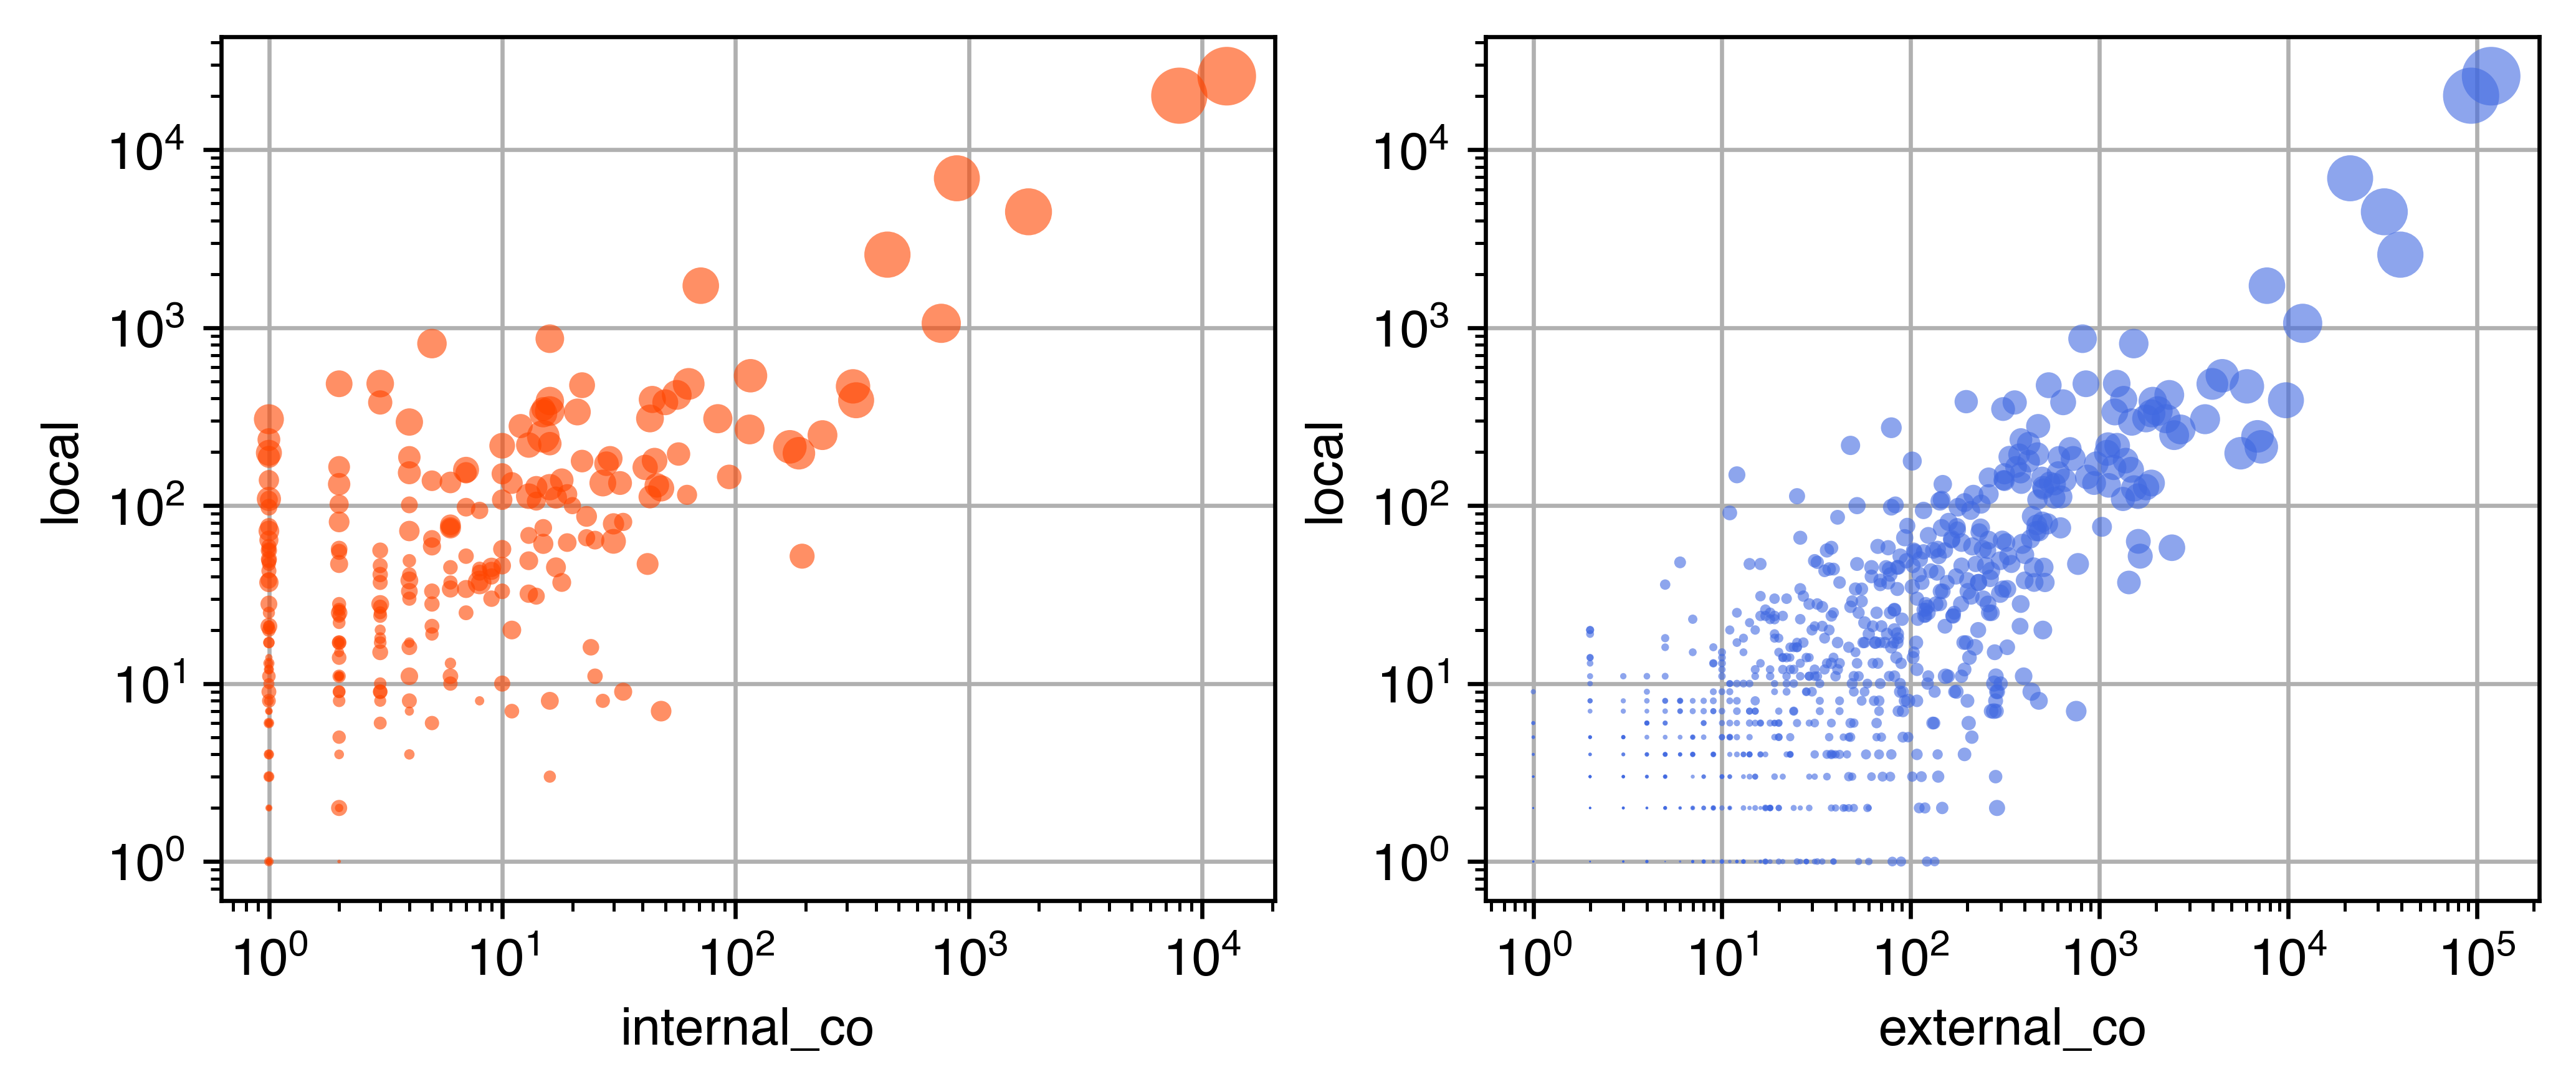

In [472]:
N_ROW = 1
N_COL = 2
X_SIZE = 4
Y_SIZE = 3
DPI = 600
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI, facecolor="none")
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col

df_collabo_gr.plot(kind="scatter", x="internal_co", y="local", ax=ax, 
                   edgecolor="none", color="orangered", alpha=.6, zorder=2, s=np.log10(cnt)**3)
plt.xscale("log")
plt.yscale("log")
plt.grid()

axi = 1
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col

df_collabo_gr.plot(kind="scatter", x="external_co", y="local", ax=ax, 
                   edgecolor="none", color="royalblue", alpha=.6, zorder=2, s=np.log10(cnt)**3)
plt.xscale("log")
plt.yscale("log")
plt.grid()

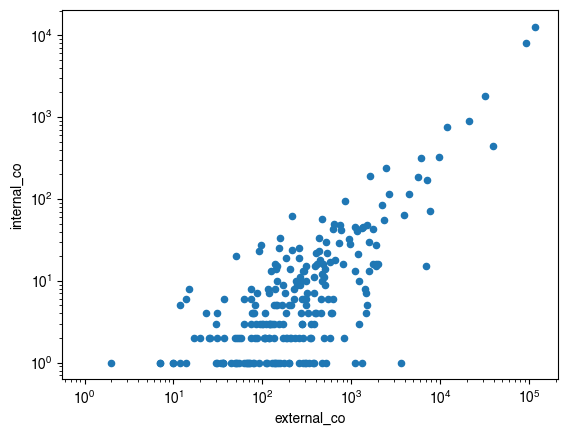

In [421]:
df_collabo_gr.plot(kind="scatter", x="external_co", y="internal_co")
plt.xscale("log")
plt.yscale("log")

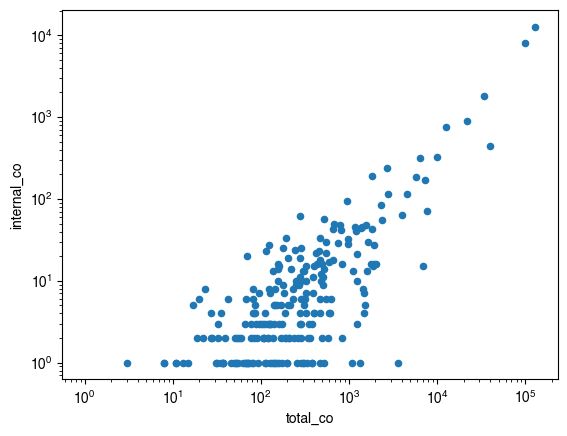

In [425]:
df_collabo_gr.plot(kind="scatter", x="total_co", y="internal_co")
plt.xscale("log")
plt.yscale("log")

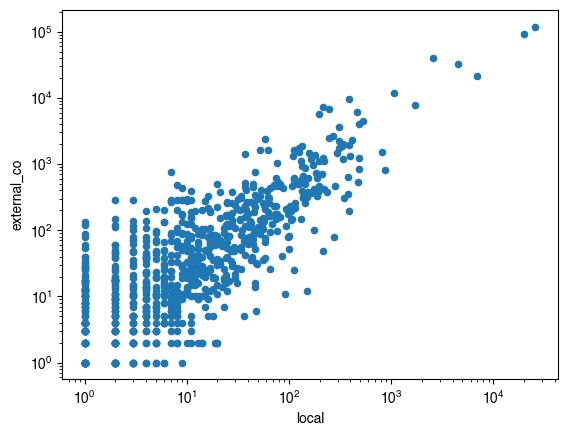

In [456]:
df_collabo_gr.plot(kind="scatter", x="local", y="external_co")
plt.xscale("log")
plt.yscale("log")

In [415]:
x = (df_collabo_gr['local'] / df_collabo_gr['external_co'])
x[x > 0].sort_values().iloc[:50]

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú
ÎØ∏ÎûòÏÜåÏû¨ÎîîÏä§Ïª§Î≤ÑÎ¶¨ÏßÄÏõê                    0.000139
Í∏∞ÌõÑÎ≥ÄÌôîÎåÄÏùëÍ∏∞Ïà†Í∞úÎ∞ú                     0.000166
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú                      0.000168
ÎÇòÎÖ∏ÏÜåÏû¨Í∏∞Ïà†Í∞úÎ∞ú                       0.000206
ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê                         0.000331
Í∏ÄÎ°úÎ≤åÌîÑÎ°†Ìã∞Ïñ¥ÏßÄÏõê                      0.000357
ÎáåÍ≥ºÌïôÏõêÏ≤úÍ∏∞Ïà†Í∞úÎ∞ú                      0.000371
Ïö∏ÏÇ∞Í≥ºÌïôÍ∏∞Ïà†Ïõê                        0.000414
Ïó∞Íµ¨Ï§ëÏã¨Î≥ëÏõêÏú°ÏÑ±                       0.000522
STEAMÏó∞Íµ¨                        0.000530
ÌïúÍµ≠Í∏∞Ï¥àÍ≥ºÌïôÏßÄÏõêÏó∞Íµ¨Ïõê                    0.000552
ÌïúÍµ≠Í≥ºÌïôÍ∏∞Ïà†Ïõê                        0.000625
Ï†ÑÏûêÏ†ïÎ≥¥ÎîîÎ∞îÏù¥Ïä§ÏÇ∞ÏóÖÏõêÏ≤úÍ∏∞Ïà†Í∞úÎ∞ú               0.000656
Ï∞®ÏÑ∏ÎåÄÎ∞îÏù¥Ïò§Í∑∏Î¶∞21                     0.000675
ÌïúÍµ≠ÏÉùÎ™ÖÍ≥µÌïôÏó∞Íµ¨Ïõê                      0.000805
Î∞©ÏÇ¨ÏÑ†Í∏∞Ïà†Í∞úÎ∞ú                        0.000850
Ïù¥Í≥µÌïôÌïôÏà†Ïó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï                    0.001087
Ïù∏Ïû¨Ì

In [406]:
df_collabo.sort_values("internal_co")[::-1]

internal_co  total_co  \
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                     uid                                          
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©                  WOS:000439737700002            6        11   
                           WOS:000485478200004            6        12   
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)                WOS:000695585400070            5         6   
Í∏∞Ï¥àÏó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï                   WOS:000693943300004            5        10   
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)                WOS:000456640000014            5         6   
...                                                     ...       ...   
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú                  WOS:000471605500005            0         2   
                           WOS:000471590700001            0         3   
                           WOS:000471465800001            0         1   
                           WOS:000471361000019            0         4   
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú WOS:000805668100005            0         0   

                                                external_co  local  
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                     uid                                      
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©                  WOS:000439737700002            5      0  
                           WOS:000485478200004            6      0  
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(Í≥ºÍ∏∞Î∂Ä)                WOS:000695585400070            1      0  
Í∏∞Ï¥àÏó∞Íµ¨Í∏∞Î∞òÍµ¨Ï∂ï                   WOS:000693943300004            5      0  
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)                WOS:000456640000014            1      0  
...                                                     ...    ...  
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú                  WOS:000471605500005            2      0  
                           WOS:000471590700001            3      0  
                           WOS:000471465800001            1      0  
                           WOS:000471361000019            4      0  
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú WOS:000805668100005            0      1  

[245062 rows x 4 columns]

In [343]:
df_edge[df_edge["ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú"] == "BK21ÏÇ¨ÏóÖ_ÌÜµÌï©"]['count'].sum()

81749

In [411]:
local

local
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                     uid                       
(Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú WOS:000805668100005      1
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©                  WOS:000416741800031      1
                           WOS:000424407200262      1
                           WOS:000424700800012      1
                           WOS:000424814300038      1
...                                               ...
Ìï¥ÏñëÏàòÏÇ∞ÌôòÍ≤ΩÍ∏∞Ïà†Í∞úÎ∞ú                 WOS:000633713900001      1
Ìï¥ÏñëÏïàÏ†ÑÎ∞èÌï¥ÏñëÍµêÌÜµÏãúÏÑ§Í∏∞Ïà†Í∞úÎ∞ú            WOS:000487807800004      1
                           WOS:000587856200001      1
ÌôîÌïôÏÇ¨Í≥†ÎåÄÏùëÌôòÍ≤ΩÍ∏∞Ïà†Í∞úÎ∞ú               WOS:000436202500009      1
ÌôòÍ≤ΩÏ†ïÏ±ÖÍ∏∞Î∞òÍ≥µÍ≥µÍ∏∞Ïà†Í∞úÎ∞ú               WOS:000518145400001      1

[989 rows x 1 columns]

In [401]:
df_edge[df_edge['uid'] == "WOS:000471465800001"]

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                  uid  count
2318    Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú  WOS:000471465800001      1
101137    ÏÇ∞Î¶ºÏÉùÎ¨ºÏ¢ÖÏó∞Íµ¨  WOS:000471465800001      1

In [396]:
(df_grouped - 1).unstack(level=0).loc["WOS:000643953700001"].dropna()

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú
BK21ÏÇ¨ÏóÖ_ÌÜµÌï©      2.0
Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)    0.0
Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú      1.0
ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê         0.0
Name: WOS:000643953700001, dtype: float64

In [397]:
df_collabo.reset_index()[df_collabo.reset_index()["uid"] == "WOS:000643953700001"]

ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú                  uid  internal_co  total_co  external_co  \
43988     BK21ÏÇ¨ÏóÖ_ÌÜµÌï©  WOS:000643953700001            2         6            4   
131081  Í∞úÏù∏Í∏∞Ï¥àÏó∞Íµ¨(ÍµêÏú°Î∂Ä)  WOS:000643953700001            0         6            6   
163687    Î∞îÏù¥Ïò§ÏùòÎ£åÍ∏∞Ïà†Í∞úÎ∞ú  WOS:000643953700001            1         6            5   
220456       ÏßëÎã®Ïó∞Íµ¨ÏßÄÏõê  WOS:000643953700001            0         6            6   

        local  
43988       0  
131081      0  
163687      0  
220456      0

In [477]:
res_tot

excellence_1                                    \
Í≥ºÏ†úÏú†Ìòï                        ÏûêÏú†Í≥µÎ™®Ìòï                                     
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú (Îã§Î∂ÄÏ≤ò)ÏàòÏó¥ÎÉâÎÇúÎ∞©Î∞èÏû¨ÏÉùÏó¥ÌïòÏù¥Î∏åÎ¶¨ÎìúÏãúÏä§ÌÖúÍ∏∞Ïà†Í∞úÎ∞ú (ÎπÑÏ¥ùÏï°)Íµ≠Î¶ΩÏàòÏÇ∞Í≥ºÌïôÏõêÍ∏∞Î≥∏Í≤ΩÎπÑ (Ï¥à)ÏÜåÌòïÏúÑÏÑ±Ï≤¥Í≥ÑÍ∞úÎ∞ú(Ìï¥Í≤ΩÏ≤≠)   
Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ                                                                
2018                          NaN              NaN              NaN   
2019                          NaN              NaN              NaN   
2020                          NaN              NaN              NaN   
2021                          NaN              NaN              NaN   
2022                          NaN              NaN              NaN   

                                                                            \
Í≥ºÏ†úÏú†Ìòï                                                                         
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú (Ï¥ùÏï°)Íµ≠Î¶ΩÏàòÏÇ∞Í≥ºÌïôÏõêÍ≥µÏùµÏöîÏõêÍ≤ΩÎπÑ (Ï¥ùÏï°)Íµ≠Î¶ΩÏàòÏÇ∞Í≥ºÌïôÏõêÍ∏∞Î≥∏Í≤ΩÎπÑ (Ï¥ùÏï°)Íµ≠Î¶ΩÏàòÏÇ∞Í≥ºÌïôÏõêÏù∏Í±¥ÎπÑ (Ï¥ùÏï°)ÎÜçÎ¶ºÏ∂ïÏÇ∞Í≤ÄÏó≠Î≥∏Î∂ÄÍ≥µÏùµÏöîÏõêÍ≤ΩÎπÑ   
Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ                                                                       
2018                 NaN             NaN            NaN                NaN   
2019                 NaN             NaN            NaN                NaN   
2020                 NaN             NaN            NaN                NaN   
2021                 NaN             NaN            NaN                NaN   
2022                 NaN             NaN            NaN                NaN   

                                                                ...  \
Í≥ºÏ†úÏú†Ìòï                                                            ...   
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú (Ï¥ùÏï°)ÎÜçÎ¶ºÏ∂ïÏÇ∞Í≤ÄÏó≠Î≥∏Î∂ÄÍ∏∞Î≥∏Í≤ΩÎπÑ (Ï¥ùÏï°)ÎÜçÎ¶ºÏ∂ïÏÇ∞Í≤ÄÏó≠Î≥∏Î∂ÄÏù∏Í±¥ÎπÑ (ÌòÅÏã†ÎèÑÏ†Ñ)ÏÉÅÏãúÏû¨ÎÇúÍ∞êÏãúÏö©ÏÑ±Ï∏µÍ∂åÎìúÎ°†Í∏∞Ïà†Í∞úÎ∞ú  ...   
Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ                                                          ...   
2018                NaN             NaN                    NaN  ...   
2019                NaN             NaN                    NaN  ...   
2020                NaN             NaN                    NaN  ...   
2021                NaN             NaN                    NaN  ...   
2022                NaN             NaN                    NaN  ...   

               Ï¥ù Ï∞∏Ïó¨Ïó∞Íµ¨Ïõê                                                     \
Í≥ºÏ†úÏú†Ìòï               ÌïòÌñ•Ïãù                                                      
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú ÌôòÍ≤ΩÏÑ±ÏßàÌôòÏòàÎ∞©Í¥ÄÎ¶¨ÌïµÏã¨Í∏∞Ïà†Í∞úÎ∞ú ÌôòÍ≤ΩÏãúÏÑ§Ïû¨ÎÇúÏû¨Ìï¥ÎåÄÏùëÍ∏∞Ïà†Í∞úÎ∞ú ÌôòÍ≤ΩÏ†ïÏ±ÖÍ∏∞Î∞òÍ≥µÍ≥µÍ∏∞Ïà†Í∞úÎ∞ú ÌôòÍ≤ΩÏ†ïÏ±ÖÏó∞Íµ¨Í∞úÎ∞ú ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨   
Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ                                                                      
2018               NaN            NaN         17.0      0.0           NaN   
2019               NaN            7.0         28.0      0.0           NaN   
2020               NaN            9.0         22.0      0.0           NaN   
2021              10.0            5.0          NaN      NaN           NaN   
2022               NaN            NaN          NaN      NaN        1033.0   

                                                                     \
Í≥ºÏ†úÏú†Ìòï                                                                  
ÏÇ¨ÏóÖÎ™Ö_Ï†ïÏ†ú ÌôòÏûêÏ§ëÏã¨ÏùòÎ£åÍ∏∞Ïà†ÏµúÏ†ÅÌôîÏó∞Íµ¨ÏÇ¨ÏóÖ Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú Ìö®Ïú®Ï†ÅÏù∏ÏπòÏïàÌôúÎèôÏùÑÏúÑÌïúÌòÑÏû•ÏßÄÏõêÍ∏∞Ïà†Í∞úÎ∞ú(Í≤ΩÏ∞∞Ï≤≠)   
Í≥ºÏ†úÏàòÌñâÏó∞ÎèÑ                                                                
2018               NaN                 NaN                      NaN   
2019              13.0                 NaN                      NaN   
2020            1198.0                 NaN                     34.0   
2021             599.0                 NaN                      5.0   
2022               NaN                43.0              